In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Preprocessing & Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import (
    roc_auc_score,
    classification_report,
    confusion_matrix,
    RocCurveDisplay,
    ConfusionMatrixDisplay
)

In [16]:
PATH = 'https://raw.githubusercontent.com/danangtric/PJJ_Data_Analytics_2026/refs/heads/main/heart.csv'
df_heart = pd.read_csv(PATH)
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [17]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [18]:
#spliting data
def split_input_output(dataset,
                       target_column,
                       save_file = True,
                       return_file = True):

    output_df = dataset[target_column]
    input_df = dataset.drop([target_column],
                            axis = 1)
    return output_df, input_df

def split_train_test(x, y, TEST_SIZE):
    x_train, x_test,\
        y_train, y_test = train_test_split(x,
                                           y,
                                           test_size=TEST_SIZE,
                                           random_state=123)
    return x_train, x_test, y_train, y_test

In [19]:
#kita pecah
TARGET = "target"
TEST_SIZE = 0.3
output_df, input_df = split_input_output(df_heart,
                                         TARGET)
x_train, x_test, y_train, y_test = split_train_test(input_df,
                                                    output_df,
                                                    TEST_SIZE)

In [20]:
#cek stratifikasi
print(y_train.value_counts(normalize = True))
print("-------------------------------------")
print(y_test.value_counts(normalize = True))

target
1    0.518828
0    0.481172
Name: proportion, dtype: float64
-------------------------------------
target
1    0.5
0    0.5
Name: proportion, dtype: float64


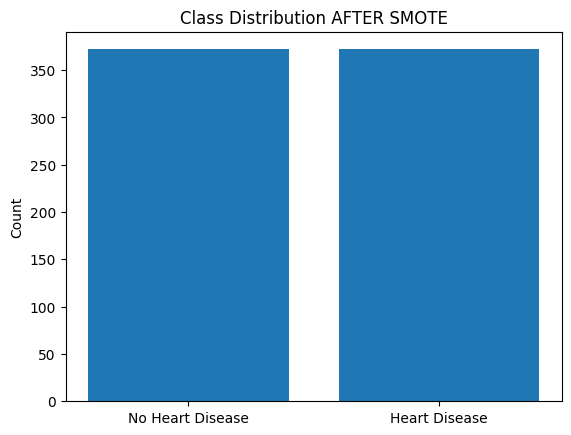

In [23]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

# Plot distribusi setelah SMOTE
plt.bar(y_train_sm.value_counts().index,
        y_train_sm.value_counts().values)

plt.xticks([0,1], ['No Heart Disease', 'Heart Disease'])
plt.ylabel("Count")
plt.title("Class Distribution AFTER SMOTE")
plt.show()


EDA

In [24]:
# combine x_train and y_train
df = pd.concat([x_train, pd.DataFrame(y_train)], axis = 1)

# check initial features
df.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

In [25]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [26]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,54.246862,0.687587,0.956764,131.953975,247.970711,0.142259,0.538354,150.864714,0.322176,1.088145,1.391911,0.741980,2.312413,0.518828
std,9.098261,0.463801,1.035447,17.427563,53.877945,0.349560,0.531409,22.436001,0.467636,1.207882,0.615073,1.029771,0.620888,0.499994
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,138.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,154.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,277.000000,0.000000,1.000000,169.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [28]:
df[['sex','target']].groupby('sex').mean()

,target
sex,
0,0.691964
1,0.440162


In [30]:
df[['cp','target']].groupby('cp').mean()

,target
cp,
0,0.254386
1,0.836066
2,0.753846
3,0.620690


In [31]:
df[['exang','target']].groupby('exang').mean()

,target
exang,
0,0.666667
1,0.207792


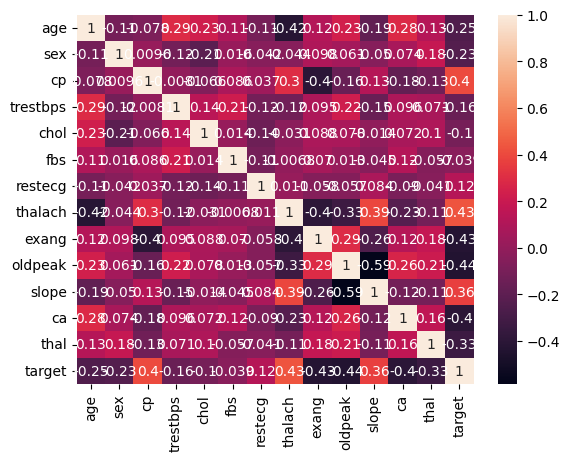

In [32]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True)
plt.show()

In [34]:
X = df.drop('target', axis=1)
y = df['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


#modeling

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_prob_lr = lr.predict_proba(X_test_scaled)[:,1]

auc_lr = roc_auc_score(y_test, y_prob_lr)
print("Logistic Regression AUC:", auc_lr)


Logistic Regression AUC: 0.8955365622032289


In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,          # pembatas penting
    min_samples_split=5,
    random_state=42
)

rf.fit(X_train, y_train)

y_prob_rf = rf.predict_proba(X_test)[:,1]

auc_rf = roc_auc_score(y_test, y_prob_rf)
print("Random Forest AUC:", auc_rf)


Random Forest AUC: 0.9741863075196407


In [42]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    rf, X, y,
    cv=5,
    scoring='roc_auc'
)

print("Random Forest CV AUC Mean:", cv_scores.mean())


Random Forest CV AUC Mean: 0.976864864864865


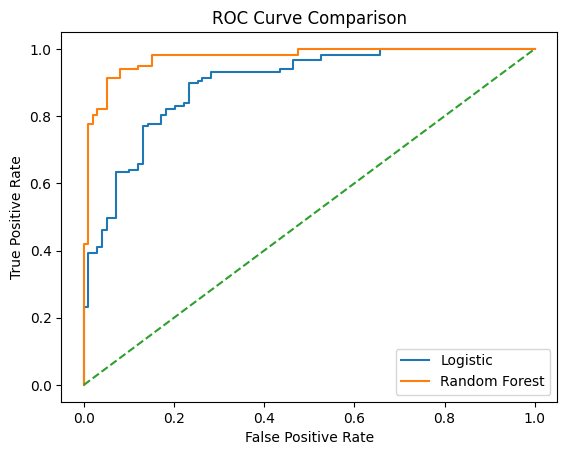

In [43]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.plot(fpr_lr, tpr_lr, label="Logistic")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0,1],[0,1],'--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


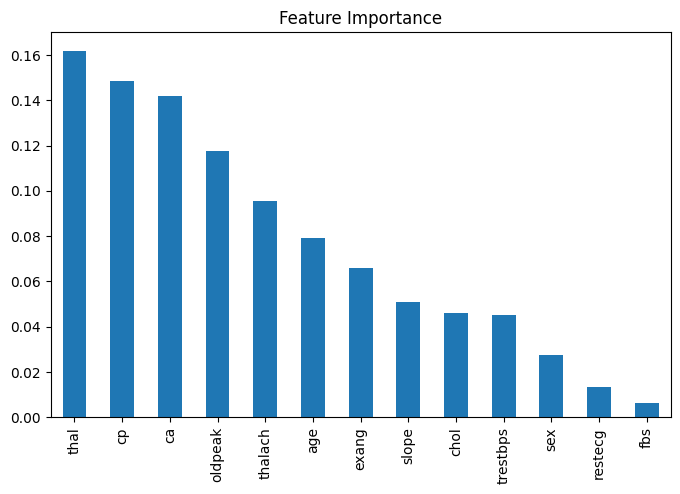

In [44]:
import pandas as pd

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.plot(kind='bar', figsize=(8,5))
plt.title("Feature Importance")
plt.show()


Berdasarkan evaluasi model, Random Forest menghasilkan AUC sebesar 0.974 pada data uji dan 0.977 pada cross-validation. Konsistensi nilai ini menunjukkan bahwa model tidak mengalami overfitting dan memiliki kemampuan generalisasi yang baik. Dibandingkan Logistic Regression yang menghasilkan AUC sebesar 0.896, Random Forest menunjukkan performa yang lebih unggul dalam memprediksi penyakit jantung. Oleh karena itu, Random Forest dipilih sebagai model terbaik.

Hyperparameter Tunning

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

# Cross validation strategy
cv = RepeatedStratifiedKFold(
    n_splits=5,
    n_repeats=2,
    random_state=42
)

# Base model
rf = RandomForestClassifier(random_state=42)

# Search space (tidak berlebihan)
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,              # cukup 20
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    random_state=42
)

# Fit tuning
random_search.fit(X_train, y_train)

# Model terbaik
best_rf = random_search.best_estimator_

# Evaluasi di test set
y_proba = best_rf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
gini = 2 * auc - 1

print("Best Parameters:", random_search.best_params_)
print("Test AUC:", auc)
print("Test Gini:", gini)


Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Test AUC: 0.9939566606233273
Test Gini: 0.9879133212466547


Kesimpulan:
Model Random Forest menunjukkan performa terbaik dengan AUC 0.994 dan Gini 0.988, yang menandakan kemampuan sangat tinggi dalam membedakan pasien dengan dan tanpa penyakit jantung, sehingga dipilih sebagai model final.

Keterbatasan:
Dataset yang digunakan relatif terbatas, sehingga kemampuan generalisasi model ke populasi yang lebih luas masih perlu diuji lebih lanjut.